In [1]:
from typing import Any, Callable, Sequence
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from maze_dataset import MazeDataset, MazeDatasetConfig
from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset.benchmark.percolation_fractions import PercolationSuccessResult, full_analysis

Testing percolation vals for config 2/2 'g4': 100%|██████████| 16/16 [00:00<00:00, 31.33it/s]


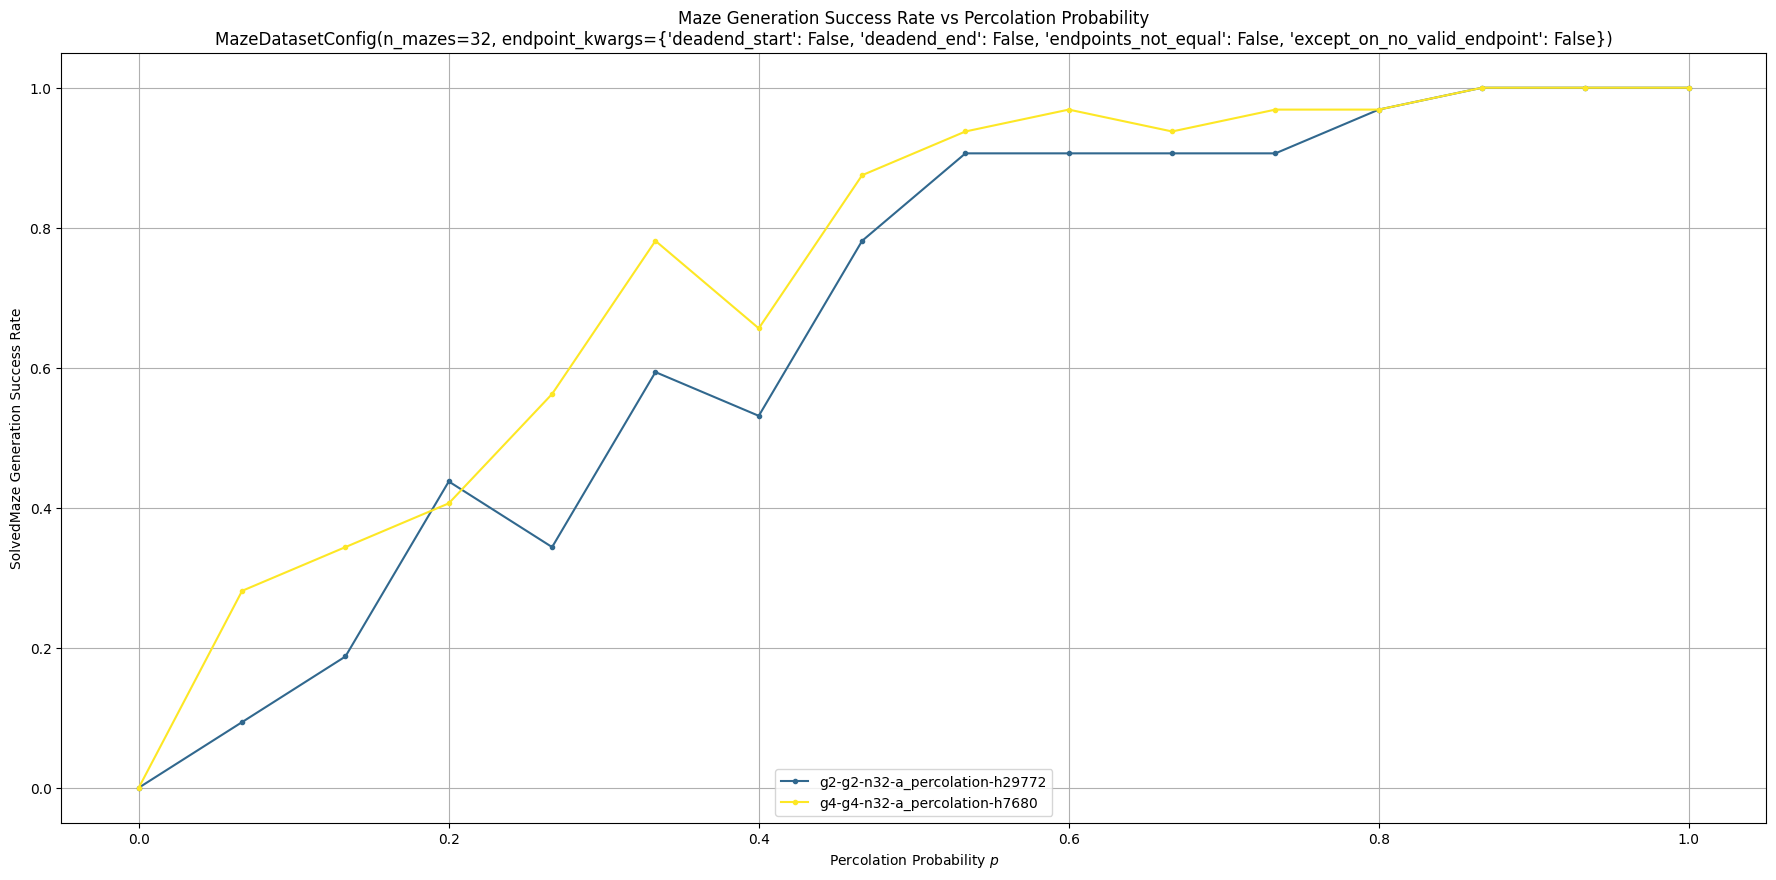

<Axes: title={'center': "Maze Generation Success Rate vs Percolation Probability\nMazeDatasetConfig(n_mazes=32, endpoint_kwargs={'deadend_start': False, 'deadend_end': False, 'endpoints_not_equal': False, 'except_on_no_valid_endpoint': False})"}, xlabel='Percolation Probability $p$', ylabel='SolvedMaze Generation Success Rate'>

In [2]:
# Run the analysis
results: PercolationSuccessResult = PercolationSuccessResult.analyze(
    configs=[
        MazeDatasetConfig(
            name=f"g{grid_n}",
            grid_n=grid_n,
            n_mazes=32,
            maze_ctor=LatticeMazeGenerators.gen_percolation,
            maze_ctor_kwargs=dict(),
            endpoint_kwargs=dict(
                deadend_start=False,
                deadend_end=False,
                endpoints_not_equal=False,
                except_on_no_valid_endpoint=False,
            ),
        )
        for grid_n in [2, 4]
    ],
    p_values=np.linspace(0.0, 1.0, 16),
)

# Plot results
results.plot(
    save_path=None, cfg_keys=["n_mazes", "endpoint_kwargs"]
)



# Analyzing 1/6: endpoint_kwargs 'any', gen_func=gen_percolation




Testing percolation vals for config 1/3 'g2-perc': 100%|██████████| 16/16 [00:00<00:00, 45.57it/s]
Testing percolation vals for config 2/3 'g4-perc': 100%|██████████| 16/16 [00:00<00:00, 30.64it/s]
Testing percolation vals for config 3/3 'g6-perc': 100%|██████████| 16/16 [00:01<00:00, 15.47it/s]




# Analyzing 2/6: endpoint_kwargs 'any', gen_func=gen_dfs_percolation




Testing percolation vals for config 1/3 'g2-dfs_perc': 100%|██████████| 16/16 [00:00<00:00, 35.29it/s]
Testing percolation vals for config 2/3 'g4-dfs_perc': 100%|██████████| 16/16 [00:01<00:00, 11.84it/s]
Testing percolation vals for config 3/3 'g6-dfs_perc': 100%|██████████| 16/16 [00:02<00:00,  6.82it/s]


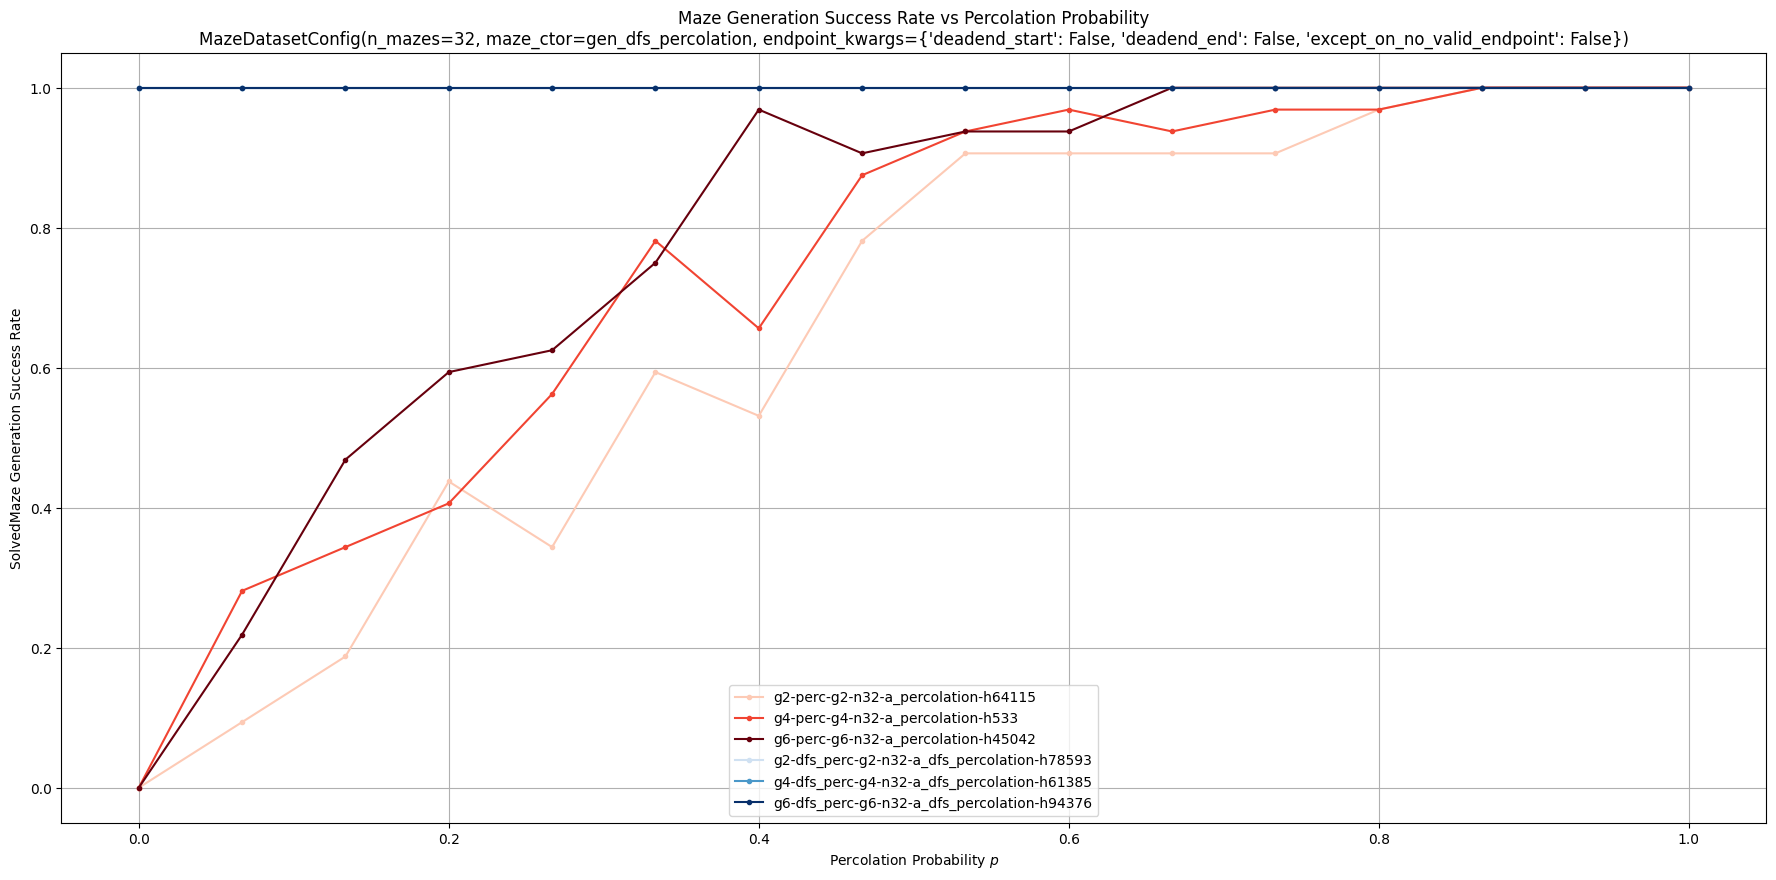



# Analyzing 3/6: endpoint_kwargs 'deadends', gen_func=gen_percolation




Testing percolation vals for config 1/3 'g2-perc': 100%|██████████| 16/16 [00:00<00:00, 44.46it/s]
Testing percolation vals for config 2/3 'g4-perc': 100%|██████████| 16/16 [00:00<00:00, 16.31it/s]
Testing percolation vals for config 3/3 'g6-perc': 100%|██████████| 16/16 [00:01<00:00,  9.03it/s]




# Analyzing 4/6: endpoint_kwargs 'deadends', gen_func=gen_dfs_percolation




Testing percolation vals for config 1/3 'g2-dfs_perc': 100%|██████████| 16/16 [00:00<00:00, 26.97it/s]
Testing percolation vals for config 2/3 'g4-dfs_perc': 100%|██████████| 16/16 [00:01<00:00,  8.61it/s]
Testing percolation vals for config 3/3 'g6-dfs_perc': 100%|██████████| 16/16 [00:04<00:00,  3.68it/s]


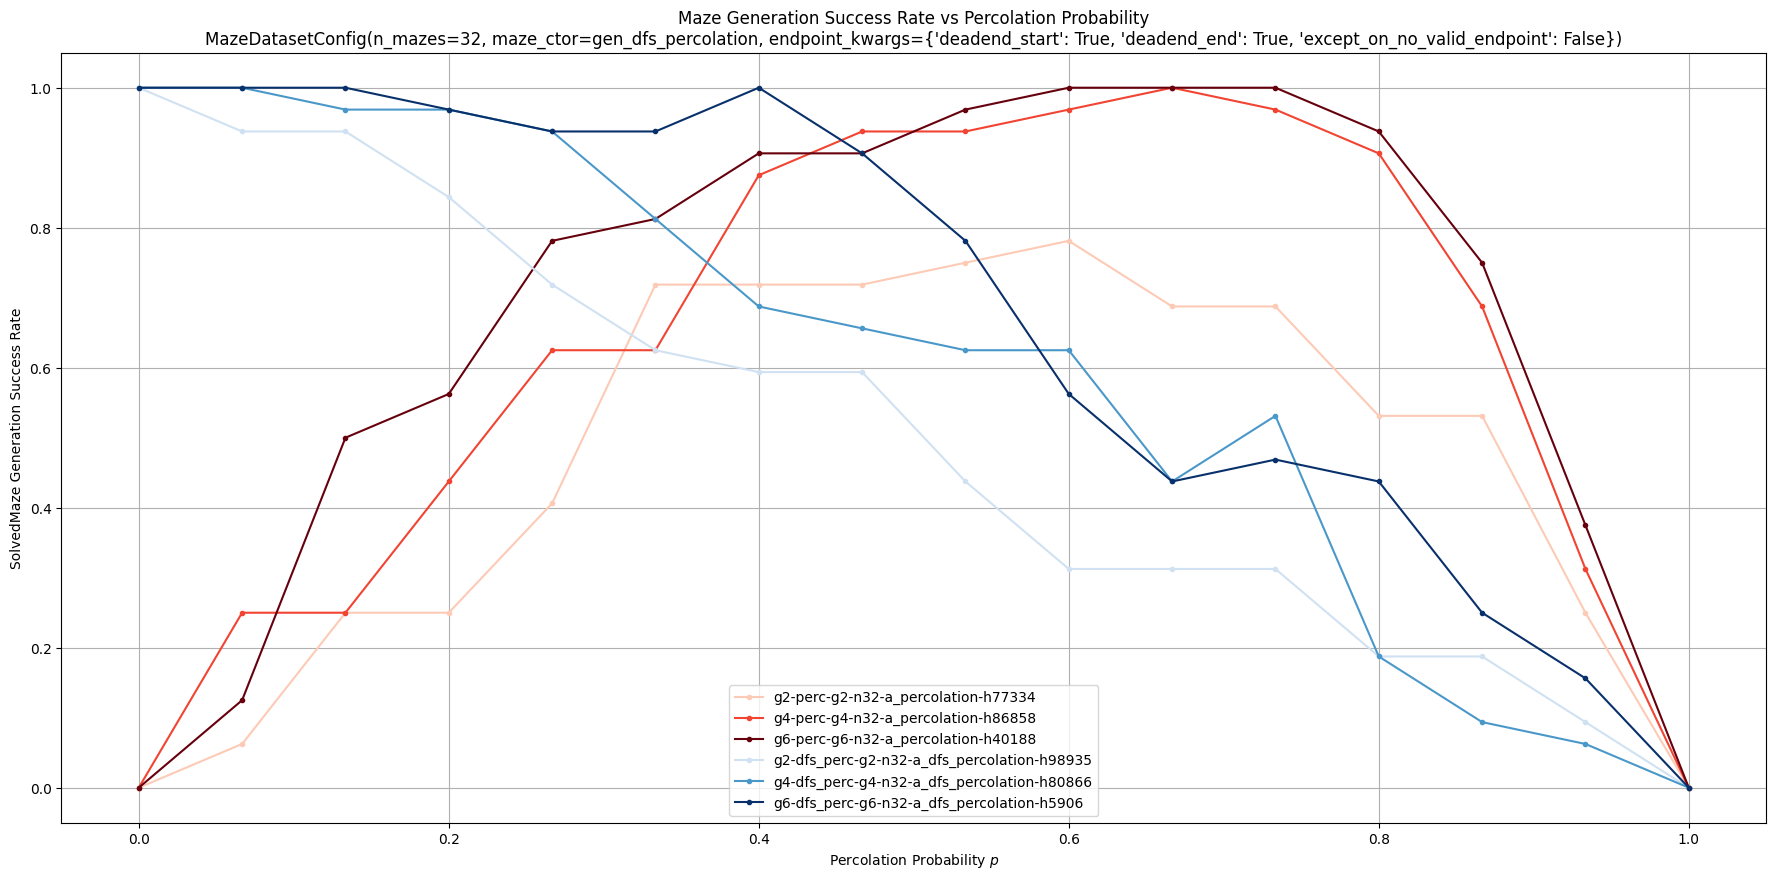



# Analyzing 5/6: endpoint_kwargs 'deadends_unique', gen_func=gen_percolation




Testing percolation vals for config 1/3 'g2-perc': 100%|██████████| 16/16 [00:00<00:00, 38.21it/s]
Testing percolation vals for config 2/3 'g4-perc': 100%|██████████| 16/16 [00:01<00:00, 14.86it/s]
Testing percolation vals for config 3/3 'g6-perc': 100%|██████████| 16/16 [00:01<00:00,  8.47it/s]




# Analyzing 6/6: endpoint_kwargs 'deadends_unique', gen_func=gen_dfs_percolation




Testing percolation vals for config 1/3 'g2-dfs_perc': 100%|██████████| 16/16 [00:00<00:00, 24.33it/s]
Testing percolation vals for config 2/3 'g4-dfs_perc': 100%|██████████| 16/16 [00:01<00:00,  8.86it/s]
Testing percolation vals for config 3/3 'g6-dfs_perc': 100%|██████████| 16/16 [00:04<00:00,  3.89it/s]


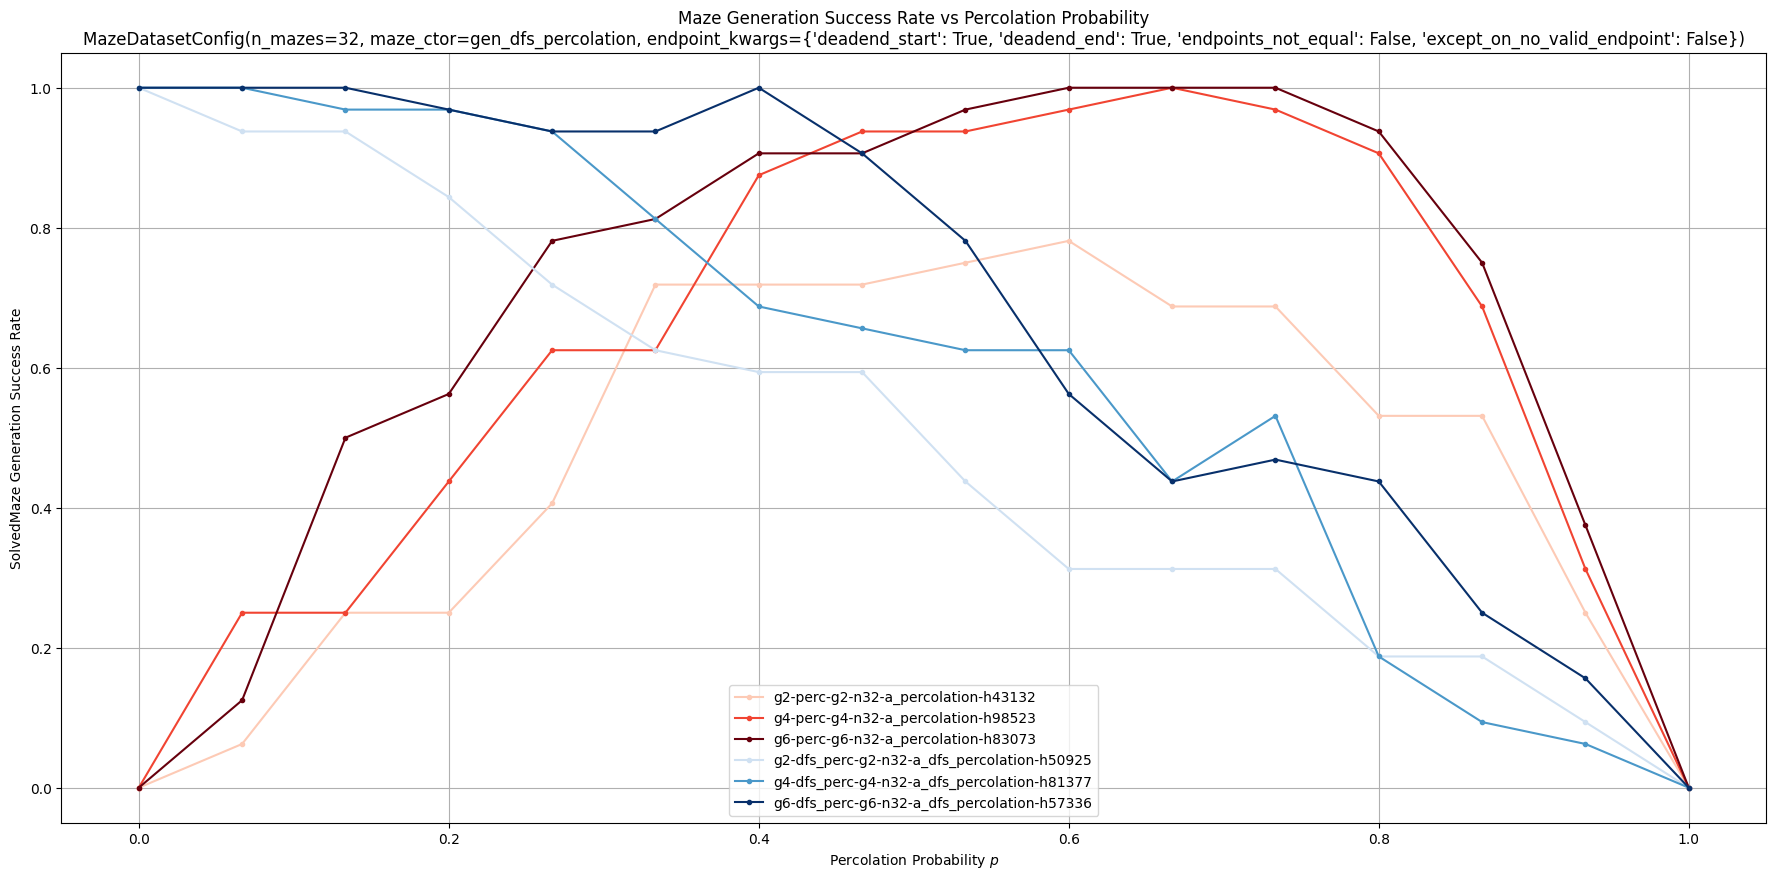

In [3]:
full_analysis(
    n_mazes=32,
    p_val_count=16,
    grid_sizes=[2, 4, 6],
)